In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from pandas import DataFrame
plt.style.use("seaborn")

<ipython-input-122-ba485d6e8d9f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [123]:
base = pd.read_excel("/content/BaseFuncionarios.xlsx")
base.head(5)

,ID RH,RG,CPF,Ramal,Estado Civil,Nome Completo,Login,Data de Nascimento,CEP,Data de Contratacao,...,Cargo,Bandeira,Codigos,Quantidade de Acessos,Ferias Acumuladas,Ferias Remuneradas,Horas Extras,Valores Adicionais,ID de Pessoal,ID da area
0,1,455550390,57507179051,6482,C,Gabriel Mesquita,gabriel.mesquita,25569,20125535,38792,...,OPV,NaN,UAK1729-MCG,140,47,NaN,97,NaN,NaN,10
1,2,732355385,50388536767,6177,C,João Haddad,joão.haddad,27145,25995770,39605,...,LOI,NaN,QDI6697-POC,143,31,NaN,166,NaN,NaN,545
2,3,943205737,59035293914,7736,C,Amanda Marques Ribeiro,amanda.ribeiro,32880,37278465,39450,...,ADI,NaN,AJB6796-ZAR,110,60,NaN,188,NaN,NaN,213
3,4,968298499,51397043200,5238,C,Guilherme Nunez,guilherme.nunez,34096,49897703,40666,...,ADII,NaN,UXE5742-IZD,101,41,NaN,176,NaN,NaN,213
4,5,332164465,1296878897,5182,C,Adelino Gomes,adelino.gomes,27118,30149335,36601,...,ADII,NaN,OKI6642-TSV,35,9,NaN,121,NaN,NaN,213


In [126]:
# Alterados o tipo das colunas de data
base["Data de Nascimento"] = base["Data de Nascimento"].astype("datetime64[ns]")
base["Data de Contratacao"] = base["Data de Contratacao"].astype("datetime64[ns]")
base["Data de Demissao"] = base["Data de Demissao"].astype("datetime64[ns]")

base.dtypes


ID RH                                               int64
RG                                                  int64
CPF                                                 int64
Ramal                                               int64
Estado Civil                                       object
Nome Completo                                      object
Login                                              object
Data de Nascimento                         datetime64[ns]
CEP                                                 int64
Data de Contratacao                        datetime64[ns]
Data de Demissao                           datetime64[ns]
Dias Uteis Trabalhados Ano Orcamentario             int64
Salario Base                                        int64
Impostos                                          float64
Beneficios                                        float64
VT                                                  int64
VR                                                float64
Cargo         

In [127]:
# Substituir valores null por 0
base.fillna(0, inplace=True)
base.head(5)

,ID RH,RG,CPF,Ramal,Estado Civil,Nome Completo,Login,Data de Nascimento,CEP,Data de Contratacao,...,Cargo,Bandeira,Codigos,Quantidade de Acessos,Ferias Acumuladas,Ferias Remuneradas,Horas Extras,Valores Adicionais,ID de Pessoal,ID da area
0,1,455550390,57507179051,6482,C,Gabriel Mesquita,gabriel.mesquita,1970-01-01 00:00:00.000025569,20125535,1970-01-01 00:00:00.000038792,...,OPV,0.0,UAK1729-MCG,140,47,0.0,97,0.0,0.0,10
1,2,732355385,50388536767,6177,C,João Haddad,joão.haddad,1970-01-01 00:00:00.000027145,25995770,1970-01-01 00:00:00.000039605,...,LOI,0.0,QDI6697-POC,143,31,0.0,166,0.0,0.0,545
2,3,943205737,59035293914,7736,C,Amanda Marques Ribeiro,amanda.ribeiro,1970-01-01 00:00:00.000032880,37278465,1970-01-01 00:00:00.000039450,...,ADI,0.0,AJB6796-ZAR,110,60,0.0,188,0.0,0.0,213
3,4,968298499,51397043200,5238,C,Guilherme Nunez,guilherme.nunez,1970-01-01 00:00:00.000034096,49897703,1970-01-01 00:00:00.000040666,...,ADII,0.0,UXE5742-IZD,101,41,0.0,176,0.0,0.0,213
4,5,332164465,1296878897,5182,C,Adelino Gomes,adelino.gomes,1970-01-01 00:00:00.000027118,30149335,1970-01-01 00:00:00.000036601,...,ADII,0.0,OKI6642-TSV,35,9,0.0,121,0.0,0.0,213


In [128]:
# Criando uma coluna com salario total (salario + Beneficios)
base["Salario Total"] = base["Salario Base"] + base["Beneficios"]
base.head(5)

,ID RH,RG,CPF,Ramal,Estado Civil,Nome Completo,Login,Data de Nascimento,CEP,Data de Contratacao,...,Bandeira,Codigos,Quantidade de Acessos,Ferias Acumuladas,Ferias Remuneradas,Horas Extras,Valores Adicionais,ID de Pessoal,ID da area,Salario Total
0,1,455550390,57507179051,6482,C,Gabriel Mesquita,gabriel.mesquita,1970-01-01 00:00:00.000025569,20125535,1970-01-01 00:00:00.000038792,...,0.0,UAK1729-MCG,140,47,0.0,97,0.0,0.0,10,26292.0
1,2,732355385,50388536767,6177,C,João Haddad,joão.haddad,1970-01-01 00:00:00.000027145,25995770,1970-01-01 00:00:00.000039605,...,0.0,QDI6697-POC,143,31,0.0,166,0.0,0.0,545,6484.8
2,3,943205737,59035293914,7736,C,Amanda Marques Ribeiro,amanda.ribeiro,1970-01-01 00:00:00.000032880,37278465,1970-01-01 00:00:00.000039450,...,0.0,AJB6796-ZAR,110,60,0.0,188,0.0,0.0,213,19279.2
3,4,968298499,51397043200,5238,C,Guilherme Nunez,guilherme.nunez,1970-01-01 00:00:00.000034096,49897703,1970-01-01 00:00:00.000040666,...,0.0,UXE5742-IZD,101,41,0.0,176,0.0,0.0,213,25566.0
4,5,332164465,1296878897,5182,C,Adelino Gomes,adelino.gomes,1970-01-01 00:00:00.000027118,30149335,1970-01-01 00:00:00.000036601,...,0.0,OKI6642-TSV,35,9,0.0,121,0.0,0.0,213,6117.6


In [52]:
# Contar total
base["Cargo"].value_counts()

ADI      38
OPI      38
LOII     36
COII     34
ADII     34
COI      34
OPII     30
FIII     30
ADIII    29
OPIII    27
COIII    26
FII      24
LOI      22
LOIII    21
FIIII    20
OPV      14
COIV     11
FIV      11
COV      11
OPIV     10
ADV      10
LOIV     10
FIIV      9
ADIV      6
LOV       4
Name: Cargo, dtype: int64

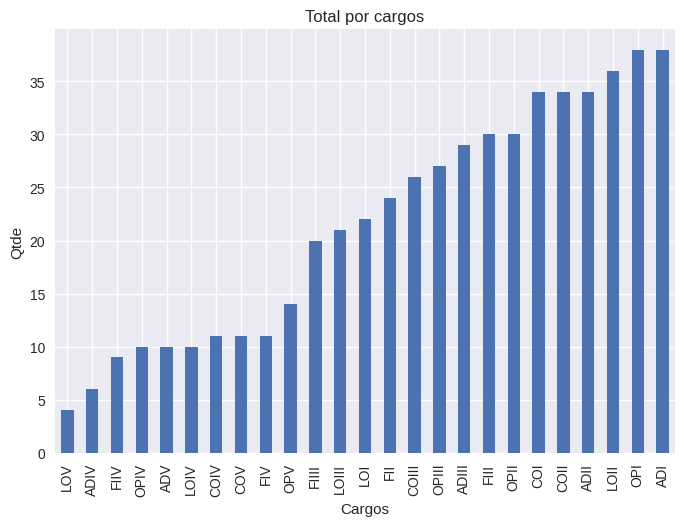

In [56]:
# Criar gráfico de coluna
base["Cargo"].value_counts(ascending=True).plot.bar(title="Total por cargos")
plt.xlabel("Cargos")
plt.ylabel("Qtde");


In [129]:
# Dados estatiscos
base["Salario Total"].describe()

count      539.000000
mean     15247.814471
std       8421.364727
min       1238.400000
25%       7851.000000
50%      15070.800000
75%      22988.400000
max      29938.800000
Name: Salario Total, dtype: float64

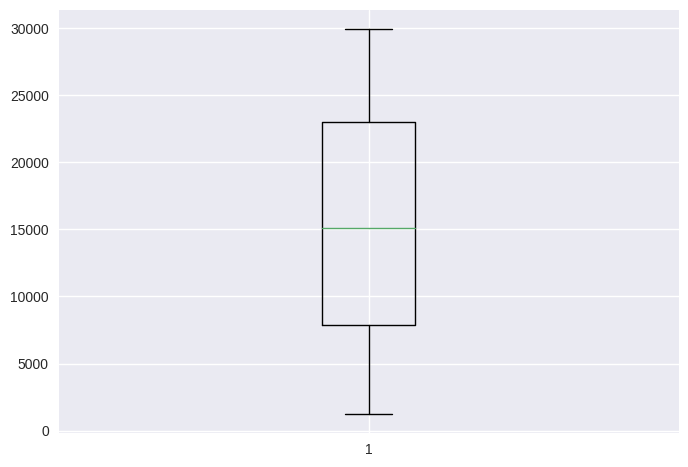

In [131]:
# Gráfico Boxplot
plt.boxplot(base["Salario Total"]);

In [133]:
# Salvar arquivo
base.to_csv("BaseProjeto.csv", index=False)